# Medical Data Visualizer

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN # type: ignore
from sklearn import metrics # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [52]:
# Reading data
df = pd.read_csv("medical_examination.csv", index_col="id")

print(df.head())

      age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            1     1      0     0   
1   20228    1     156    85.0    140     90            3     1      0     0   
2   18857    1     165    64.0    130     70            3     1      0     0   
3   17623    2     169    82.0    150    100            1     1      0     0   
4   17474    1     156    56.0    100     60            1     1      0     0   

    active  cardio  
id                  
0        1       0  
1        1       1  
2        0       1  
3        1       1  
4        0       0  


In [53]:
df.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            1     1      0     0   
1   20228    1     156    85.0    140     90            3     1      0     0   
2   18857    1     165    64.0    130     70            3     1      0     0   
3   17623    2     169    82.0    150    100            1     1      0     0   
4   17474    1     156    56.0    100     60            1     1      0     0   

    active  cardio  
id                  
0        1       0  
1        1       1  
2        0       1  
3        1       1  
4        0       0

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


# Analysis

## Calculating the BMI for each patient

In [55]:
bmi = round((703 * (df["weight"] / df["height"] ** 2)) * 10, 2)

print(bmi)

print(bmi.values)

id
0        15.44
1        24.55
2        16.53
3        20.18
4        16.18
         ...  
99993    18.93
99995    35.48
99996    22.04
99998    19.05
99999    17.51
Length: 70000, dtype: float64
[15.44 24.55 16.53 ... 22.04 19.05 17.51]


In [56]:
# df["overweight"] = bmi.apply(lambda x: x)

# print(df)

# for idx, each in bmi.items():
#     # print("{} -> {}".format(idx, each))
#     # (df.iloc[idx])["overweight"] = each
#     print(df.iloc[idx])

# Merging the bmi series into the primary dataset
# print(df)
    
df["overweight"] = bmi.apply(lambda x: 1 if x > 25 else 0)
print(df.head())

      age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            1     1      0     0   
1   20228    1     156    85.0    140     90            3     1      0     0   
2   18857    1     165    64.0    130     70            3     1      0     0   
3   17623    2     169    82.0    150    100            1     1      0     0   
4   17474    1     156    56.0    100     60            1     1      0     0   

    active  cardio  overweight  
id                              
0        1       0           0  
1        1       1           0  
2        0       1           0  
3        1       1           0  
4        0       0           0  


In [57]:
test = pd.DataFrame({'A': [5, 7, 2, 69, 1]})

test['A'] = test['A'].apply(lambda x: 1 if x > 5 else 0)

test

A
0  0
1  1
2  0
3  1
4  0

In [58]:
# Normalizing the values at variables
df["cholesterol"] = df["cholesterol"].apply(lambda x: 1 if x > 1 else 0)
df["gluc"] = df["gluc"].apply(lambda x: 1 if x > 1 else 0)

# for idx, val in df.iterrows():
#     # if idx == 4:
#     #     break
#     # print((df.iloc[idx])["cholesterol"])
#     # if (df.iloc[idx])["cholesterol"] > 1:
#     #     (df.iloc[idx])["cholesterol"] = 1
#     # else:
#     #     (df.iloc[idx])["cholesterol"] = 0
#     print(idx)

# # print(df.head())
# print(df.iloc[99999])
df.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            0     0      0     0   
1   20228    1     156    85.0    140     90            1     0      0     0   
2   18857    1     165    64.0    130     70            1     0      0     0   
3   17623    2     169    82.0    150    100            0     0      0     0   
4   17474    1     156    56.0    100     60            0     0      0     0   

    active  cardio  overweight  
id                              
0        1       0           0  
1        1       1           0  
2        0       1           0  
3        1       1           0  
4        0       0           0

In [59]:
print(df[df["age"] == 22584])

         age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
12     22584    2     178    95.0    130     90            1     1      0   
6831   22584    1     153    66.0    110     60            0     1      0   
9096   22584    1     169    55.0    110     90            0     0      0   
9397   22584    1     159    65.0    155     90            0     0      0   
42161  22584    1     156    85.0    120     90            0     0      0   
43310  22584    1     160    64.0    140     90            0     0      0   
57132  22584    2     176    84.0    140     90            0     0      1   
57268  22584    1     168    57.0    120     80            0     0      0   
64343  22584    1     161   100.0    120     80            0     0      0   
67005  22584    2     182   112.0    130     80            0     0      0   
79146  22584    1     165    56.0    120     80            0     0      0   

In [60]:
data1 = {'Name':['Jai', 'Anuj', 'Jai', 'Princi', 
                 'Gaurav', 'Anuj', 'Princi', 'Abhi', "Anuj"], 
        'Age':[27, 24, 22, 32, 
               33, 36, 27, 32, 20], 
        'Address':['Nagpur', 'Kanpur', 'Allahabad', 'Kannuaj',
                   'Jaunpur', 'Kanpur', 'Allahabad', 'Aligarh', '?'], 
        'Qualification':['Msc', 'MA', 'MCA', 'Phd',
                         'B.Tech', 'B.com', 'Msc', 'MA', '?']}
df1 = pd.DataFrame(data1)
print(df1)  

print("\n\n{}".format(df1.groupby("Name").groups))

print("\n\n")

df1_1 = df1.groupby("Name")
# print(df1_1.head())

print("\n\n\n\n")
# Iterating over groups and print each group
for name, group in df1_1:
    print("Group: {}".format(name))
    print(group)
    
print(df1_1.get_group("Jai"))

     Name  Age    Address Qualification
0     Jai   27     Nagpur           Msc
1    Anuj   24     Kanpur            MA
2     Jai   22  Allahabad           MCA
3  Princi   32    Kannuaj           Phd
4  Gaurav   33    Jaunpur        B.Tech
5    Anuj   36     Kanpur         B.com
6  Princi   27  Allahabad           Msc
7    Abhi   32    Aligarh            MA
8    Anuj   20          ?             ?


{'Abhi': [7], 'Anuj': [1, 5, 8], 'Gaurav': [4], 'Jai': [0, 2], 'Princi': [3, 6]}








Group: Abhi
   Name  Age  Address Qualification
7  Abhi   32  Aligarh            MA
Group: Anuj
   Name  Age Address Qualification
1  Anuj   24  Kanpur            MA
5  Anuj   36  Kanpur         B.com
8  Anuj   20       ?             ?
Group: Gaurav
     Name  Age  Address Qualification
4  Gaurav   33  Jaunpur        B.Tech
Group: Jai
  Name  Age    Address Qualification
0  Jai   27     Nagpur           Msc
2  Jai   22  Allahabad           MCA
Group: Princi
     Name  Age    Address Qualification
3  Prin

In [61]:
# cat_df = pd.melt(df.reset_index(), id_vars=["id"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight", "cardio"])
# print(cat_df.info())
# print((cat_df["variable"]).unique())

# print("Values in the cardio column{}".format(cat_df[cat_df["variable"] == "cardio"].values))

# print("\n\n")

# cat_df = cat_df.groupby([cat_df["variable"] == "cardio"])
# print(cat_df.groups)
# # print((cat_df["variable"]).unique())
# nonCardio = cat_df.get_group(True)
# print(nonCardio[nonCardio["variable"] == "cardio"])


In [62]:
# drawing the Categorical Plot
cat_df = pd.melt(df.reset_index(), id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"])

print(cat_df.head())

# Classifying patients who do cardio and who do not into each seperate group
print("\n\n")
cardioClassifier = cat_df.groupby(["cardio"])
print(cardioClassifier.groups)

for name, group in cardioClassifier:
    print("{} -> {}".format(name, group))
    
print(cardioClassifier.get_group(1))

   cardio     variable  value
0       0  cholesterol      0
1       1  cholesterol      1
2       1  cholesterol      1
3       1  cholesterol      0
4       0  cholesterol      0



{0: [0, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 25, 26, 27, 28, 29, 32, 35, 36, 37, 40, 47, 48, 49, 50, 55, 56, 60, 62, 63, 66, 72, 74, 80, 81, 85, 89, 90, 93, 94, 95, 96, 100, 101, 102, 103, 112, 114, 116, 118, 119, 123, 125, 126, 131, 132, 133, 136, 137, 138, 139, 140, 145, 146, 148, 149, 152, 157, 160, 161, 162, 163, 164, 167, 173, 175, 176, 177, 178, 180, 183, 185, 186, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, ...], 1: [1, 2, 3, 7, 15, 22, 24, 30, 31, 33, 34, 38, 39, 41, 42, 43, 44, 45, 46, 51, 52, 53, 54, 57, 58, 59, 61, 64, 65, 67, 68, 69, 70, 71, 73, 75, 76, 77, 78, 79, 82, 83, 84, 86, 87, 88, 91, 92, 97, 98, 99, 104, 105, 106, 107, 108, 109, 110, 111, 113, 115, 117, 120, 121, 122, 124, 127, 128, 129, 130, 134, 135, 141, 142, 143, 144, 147, 150, 151, 153, 154, 155, 15

/tmp/ipykernel_54808/693033961.py:14: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  print(cardioClassifier.get_group(1))


We have just classified patients who do cardio and who do not into 2 distinct groups

Group 0: those do not cardio


Group 1: who do cardio

In [63]:
thoseDoCardio = cardioClassifier.get_group(1)
thoseDontCardio = cardioClassifier.get_group(0)

# print(thoseDoCardio.value_counts())
print("\n\n")
# print(thoseDoCardio[thoseDoCardio["variable"] == "smoke"].value_counts)

cat_df = cat_df.groupby(["cardio", "variable", "value"], as_index=False)

print(cat_df.groups)
groupNames = []
for name, group in cat_df:
    groupNames.append(name)
    print("{} -> {}".format(name, group))

print(groupNames)

cat_df.head()

/tmp/ipykernel_54808/2537286435.py:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  thoseDoCardio = cardioClassifier.get_group(1)
/tmp/ipykernel_54808/2537286435.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  thoseDontCardio = cardioClassifier.get_group(0)


{(0, 'active', 0): [280004, 280005, 280009, 280012, 280016, 280018, 280029, 280040, 280047, 280050, 280055, 280074, 280089, 280101, 280116, 280126, 280149, 280157, 280161, 280167, 280195, 280196, 280199, 280201, 280229, 280232, 280234, 280238, 280246, 280268, 280271, 280274, 280278, 280281, 280285, 280300, 280334, 280373, 280374, 280388, 280427, 280430, 280435, 280436, 280442, 280451, 280457, 280482, 280483, 280498, 280501, 280503, 280518, 280529, 280534, 280539, 280541, 280553, 280562, 280572, 280573, 280582, 280591, 280602, 280604, 280625, 280633, 280651, 280669, 280689, 280717, 280722, 280727, 280748, 280751, 280753, 280755, 280758, 280760, 280770, 280784, 280785, 280794, 280797, 280808, 280826, 280828, 280842, 280856, 280860, 280862, 280879, 280886, 280889, 280908, 280919, 280922, 280926, 280929, 280935, ...], (0, 'active', 1): [280000, 280006, 280008, 280010, 280011, 280013, 280014, 280017, 280019, 280020, 280021, 280023, 280025, 280026, 280027, 280028, 280032, 280035, 280036, 280

cardio     variable  value
0            0  cholesterol      0
1            1  cholesterol      1
2            1  cholesterol      1
3            1  cholesterol      0
4            0  cholesterol      0
...        ...          ...    ...
350065       1   overweight      1
350224       0   overweight      1
350259       0   overweight      1
350261       0   overweight      1
350286       0   overweight      1

[120 rows x 3 columns]

In [64]:
print(cat_df.value_counts())


    cardio     variable  value  count
0        0       active      0   6378
1        0       active      1  28643
2        0         alco      0  33080
3        0         alco      1   1941
4        0  cholesterol      0  29330
5        0  cholesterol      1   5691
6        0         gluc      0  30894
7        0         gluc      1   4127
8        0   overweight      0  33316
9        0   overweight      1   1705
10       0        smoke      0  31781
11       0        smoke      1   3240
12       1       active      0   7361
13       1       active      1  27618
14       1         alco      0  33156
15       1         alco      1   1823
16       1  cholesterol      0  23055
17       1  cholesterol      1  11924
18       1         gluc      0  28585
19       1         gluc      1   6394
20       1   overweight      0  31297
21       1   overweight      1   3682
22       1        smoke      0  32050
23       1        smoke      1   2929


[(0, 'active', 0), (0, 'active', 1), (0, 'alco', 0), (0, 'alco', 1), (0, 'cholesterol', 0), (0, 'cholesterol', 1), (0, 'gluc', 0), (0, 'gluc', 1), (0, 'overweight', 0), (0, 'overweight', 1), (0, 'smoke', 0), (0, 'smoke', 1), (1, 'active', 0), (1, 'active', 1), (1, 'alco', 0), (1, 'alco', 1), (1, 'cholesterol', 0), (1, 'cholesterol', 1), (1, 'gluc', 0), (1, 'gluc', 1), (1, 'overweight', 0), (1, 'overweight', 1), (1, 'smoke', 0), (1, 'smoke', 1)]

We divided patients into groups contains those who are facing the same conditions with them

Groups:

    - Group 0 -> patients who do not cardio:

        + (0, "active", 0) -> Patients who ain't active (6378 patients)
        + (0, "active", 1) -> Patients who are active (28643)
        + (0, "alco", 0) -> Patients who don't drink (33080)
        + (0, "alco", 1) -> Patients who do drink (1941)
        + (0, "cholesterol", 0) -> Patients who don't have high cholesterol (29330)
        + (0, "cholesterol", 1) -> Patients who have high cholesterol (5691)
        + (0, "gluc", 0) -> Patients who don't have large amount of glucozo in their blood  vessel (30894)
        + (0, "gluc", 1) -> Patients who have large amount of glucozo in their blood vessel (4127)
        + (0, "overweight", 0) -> Patients who are not obesity (33316)
        + (0, "overweight", 1) -> Patients who are obesity (1705)
        + (0, "smoke", 0) -> Patients who do not smoke (31781)
        + (0, "smoke", 1) -> Patients who do smoke (3240)

    - Group 1 -> patients who do cardio:

        + (1, "active", 0) -> Patients who ain't active (7361)
        + (1, "active", 1) -> Patients who are active (27618)
        + (1, "alco", 0) -> Patients who don't drink (33156)
        + (1, "alco", 1) -> Patients who do drink (1823)
        + (1, "cholesterol", 0) -> Patients who don't have high cholesterol (23055)
        + (1, "cholesterol", 1) -> Patients who have high cholesterol (11924)
        + (1, "gluc", 0) -> Patients who don't have large amount of glucozo in their blood vessel (28585)
        + (1, "gluc", 1) -> Patients who have large amount of glucozo in their blood vessel (6394)
        + (1, "overweight", 0) -> Patients who are not obesity (31297)
        + (1, "overweight", 1) -> Patients who are obesity (3682)
        + (1, "smoke", 0) -> Patients who do not smoke (32050)
        + (1, "smoke", 1) -> Patients who do smoke (2929)


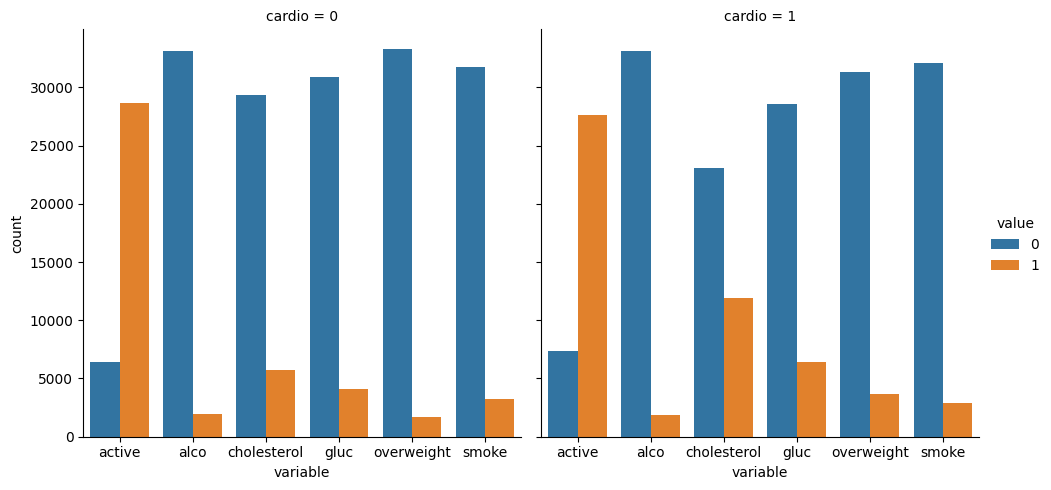

In [65]:
# plt.figure(figsize=(8, 6))
# plt.title("Value counts of the categorical features")
sns.catplot(data=cat_df.value_counts(), x="variable", y="count", hue="value", kind="bar", col="cardio")
# plt.plot()

Filtering patients with incorrect data
 - diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
 - height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
 - height is more than the 97.5th percentile
 - weight is less than the 2.5th percentile
 - weight is more than the 97.5th percentile

In [66]:
# Filtering out data with patient segments that represent incorrect data
heat_df = df[
    (df["ap_lo"] <= df["ap_hi"]) &
    (df["height"] >= df["height"].quantile(0.025)) &
    (df["height"] <= df["height"].quantile(0.975)) &
    (df["weight"] >= df["weight"].quantile(0.025)) &
    (df["weight"] <= df["weight"].quantile(0.975))
]

print(heat_df.head())

      age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
id                                                                             
0   18393    2     168    62.0    110     80            0     0      0     0   
1   20228    1     156    85.0    140     90            1     0      0     0   
2   18857    1     165    64.0    130     70            1     0      0     0   
3   17623    2     169    82.0    150    100            0     0      0     0   
4   17474    1     156    56.0    100     60            0     0      0     0   

    active  cardio  overweight  
id                              
0        1       0           0  
1        1       1           0  
2        0       1           0  
3        1       1           0  
4        0       0           0  


In [67]:
# Correlation matrix between variables
corr = heat_df.corr()
corr

age       sex    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.018132 -0.076932  0.070168  0.018689  0.153508   
sex         -0.018132  1.000000  0.505785  0.129979  0.005063  0.059947   
height      -0.076932  0.505785  1.000000  0.251503  0.004586  0.017922   
weight       0.070168  0.129979  0.251503  1.000000  0.027030  0.227922   
ap_hi        0.018689  0.005063  0.004586  0.027030  1.000000  0.072803   
ap_lo        0.153508  0.059947  0.017922  0.227922  0.072803  1.000000   
cholesterol  0.129996 -0.037605 -0.063522  0.135981  0.022807  0.150362   
gluc         0.086990 -0.021357 -0.030469  0.107072  0.011111  0.074840   
smoke       -0.044371  0.337436  0.187830  0.056533 -0.001928  0.023275   
alco        -0.026970  0.168637  0.089785  0.059917  0.000769  0.033042   
active      -0.011445  0.007864 -0.005661 -0.014430 -0.000222  0.001569   
cardio       0.240241  0.002320 -0.024102  0.170042  0.050556  0.327181   
overweight   0.049392 -0.122299 -0.193496  0.464335  0.014592  0.100303   

             cholesterol      gluc     smoke      alco    active    cardio  \
age             0.129996  0.086990 -0.044371 -0.026970 -0.011445  0.240241   
sex            -0.037605 -0.021357  0.337436  0.168637  0.007864  0.002320   
height         -0.063522 -0.030469  0.187830  0.089785 -0.005661 -0.024102   
weight          0.135981  0.107072  0.056533  0.059917 -0.014430  0.170042   
ap_hi           0.022807  0.011111 -0.001928  0.000769 -0.000222  0.050556   
ap_lo           0.150362  0.074840  0.023275  0.033042  0.001569  0.327181   
cholesterol     1.000000  0.383743  0.012680  0.038446  0.002494  0.203467   
gluc            0.383743  1.000000 -0.004157  0.014297 -0.010145  0.088445   
smoke           0.012680 -0.004157  1.000000  0.341200  0.026940 -0.020345   
alco            0.038446  0.014297  0.341200  1.000000  0.025847 -0.011088   
active          0.002494 -0.010145  0.026940  0.025847  1.000000 -0.037339   
cardio          0.203467  0.088445 -0.020345 -0.011088 -0.037339  1.000000   
overweight      0.093206  0.065087 -0.040196 -0.003919 -0.008461  0.085537   

             overweight  
age            0.049392  
sex           -0.122299  
height        -0.193496  
weight         0.464335  
ap_hi          0.014592  
ap_lo          0.100303  
cholesterol    0.093206  
gluc           0.065087  
smoke         -0.040196  
alco          -0.003919  
active        -0.008461  
cardio         0.085537  
overweight     1.000000

[[ 1.00000000e+00 -1.81320052e-02 -7.69318347e-02  7.01683896e-02
   1.86894095e-02  1.53507973e-01  1.29996176e-01  8.69901449e-02
  -4.43706471e-02 -2.69695382e-02 -1.14451266e-02  2.40241089e-01
   4.93917988e-02]
 [ 0.00000000e+00  1.00000000e+00  5.05784851e-01  1.29979320e-01
   5.06250408e-03  5.99466484e-02 -3.76050443e-02 -2.13573847e-02
   3.37435881e-01  1.68637124e-01  7.86370242e-03  2.31999158e-03
  -1.22298790e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.51502865e-01
   4.58573625e-03  1.79224331e-02 -6.35217890e-02 -3.04690159e-02
   1.87829575e-01  8.97850523e-02 -5.66147972e-03 -2.41019167e-02
  -1.93495711e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   2.70301864e-02  2.27921644e-01  1.35980961e-01  1.07071633e-01
   5.65328321e-02  5.99166585e-02 -1.44302415e-02  1.70041786e-01
   4.64334898e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  7.28027646e-02  2.28068897e-02  1.11111745e-02


[]

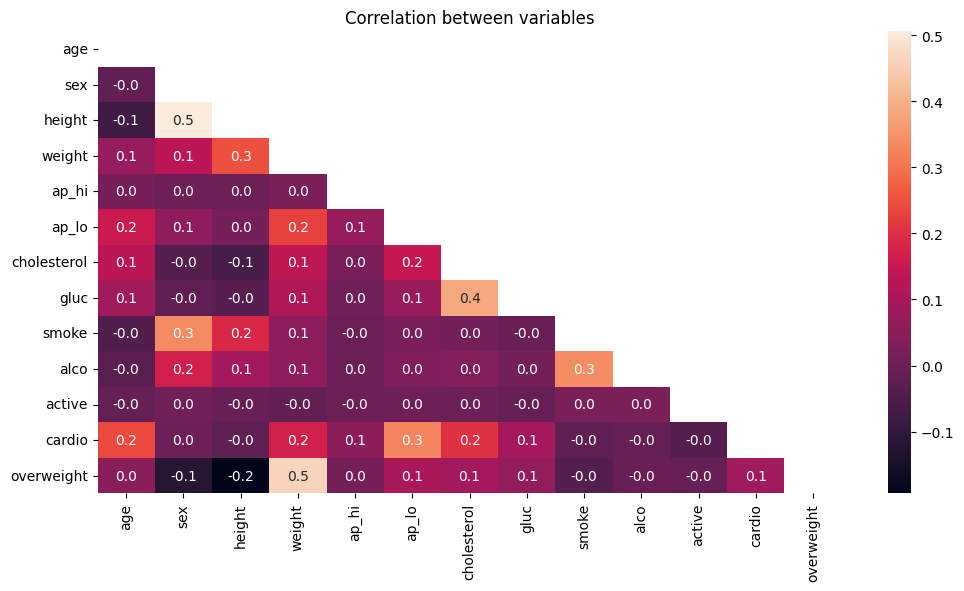

In [68]:
# Setting up mask for the upper triangle
mask = np.triu(corr)
print(mask)


# Visualizing the correlation between variables with Heat Map
plt.figure(figsize=(12, 6))
plt.title("Correlation between variables")
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f")
plt.plot()

# Report

- People who do not do the exercise or cardio are almost being overweight

- If an individual has so much weight, the higher chance he / she is going to be overweight

- A person who smoke can relatively either drink and the vice versa

- Patients have high cholesterol can either have high amount of glucozo in their blood vessel

- Patients who usually do cardio have remarkably low percentage of being high in `ap`,glucozo and weight

In [69]:
weight_col = df["weight"]

weight_mean = weight_col.mean()
print(weight_mean)

print(weight_col.std())

74.20569
14.39575667851138


# Fragmenting patients into groups based on their physical condition with ML

## DBSCAN

In [70]:
# Data splitting
# strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# for train_idx, test_idx in strat_split.split(df.data, df.target):
#     X_train, X_test = df

X = df.values
print(X)

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data splitting
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

[[1.8393e+04 2.0000e+00 1.6800e+02 ... 1.0000e+00 0.0000e+00 0.0000e+00]
 [2.0228e+04 1.0000e+00 1.5600e+02 ... 1.0000e+00 1.0000e+00 0.0000e+00]
 [1.8857e+04 1.0000e+00 1.6500e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.9066e+04 2.0000e+00 1.8300e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.2431e+04 1.0000e+00 1.6300e+02 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [2.0540e+04 1.0000e+00 1.7000e+02 ... 1.0000e+00 0.0000e+00 0.0000e+00]]


In [71]:
print(X_train)
print(len(X_train))

print("\n\n{}".format(X_test))
print(len(X_test))

[[ 0.9756408  -0.7330397  -1.26177139 ...  0.49416711  1.00060018
  -0.28874438]
 [-1.11536472  1.36230021 -0.28735799 ... -2.02360695  1.00060018
  -0.28874438]
 [ 0.67246729  1.36230021  1.17426211 ...  0.49416711  1.00060018
  -0.28874438]
 ...
 [ 1.66994055 -0.7330397   0.56525373 ...  0.49416711 -0.99940018
  -0.28874438]
 [-0.50334334 -0.7330397   0.32165038 ... -2.02360695 -0.99940018
  -0.28874438]
 [-1.76508014  1.36230021  1.53966713 ...  0.49416711 -0.99940018
  -0.28874438]]
56000


[[ 0.9326777  -0.7330397  -1.01816804 ...  0.49416711  1.00060018
  -0.28874438]
 [ 0.9756408  -0.7330397   0.68705541 ...  0.49416711  1.00060018
  -0.28874438]
 [ 1.54064597 -0.7330397  -1.62717642 ...  0.49416711  1.00060018
   3.46327091]
 ...
 [ 1.271924   -0.7330397   0.07804703 ... -2.02360695 -0.99940018
  -0.28874438]
 [ 0.08152213 -0.7330397  -0.89636637 ...  0.49416711  1.00060018
   3.46327091]
 [-0.4656493   1.36230021  1.41786546 ... -2.02360695  1.00060018
  -0.28874438]]
14000


In [72]:
# Model training
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

DBSCAN()

In [73]:

# Model evaluation
labels_train = dbscan.labels_
print(labels_train)

# Number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels_train)) - (1 if -1 in labels_train else 0)
n_noise = list(labels_train).count(-1)

# Removing noise points (-1 labels) for evaluation
core_samples_mask = labels_train != -1
X_core = X_train[core_samples_mask]
labels_core = labels_train[core_samples_mask]

print("Estimated number of clusters: {}".format(n_clusters))
print("Estimated number of noise points: {}".format(n_noise))
# print("Homogenity: {}".format(metrics.homogeneity_score()))

print(core_samples_mask)
print(X_core)
print(labels_core)

# Silhouette Score
silhouette = silhouette_score(X_core, labels_core)
print(f"Silhouette score: {silhouette}")

# Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_core, labels_core)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_core, labels_core)
print(f"Davies-Bouldin Index: {davies_bouldin}")

[ 0  1  2 ...  3 15  5]
Estimated number of clusters: 187
Estimated number of noise points: 7316
[ True  True  True ...  True  True  True]
[[ 0.9756408  -0.7330397  -1.26177139 ...  0.49416711  1.00060018
  -0.28874438]
 [-1.11536472  1.36230021 -0.28735799 ... -2.02360695  1.00060018
  -0.28874438]
 [ 0.67246729  1.36230021  1.17426211 ...  0.49416711  1.00060018
  -0.28874438]
 ...
 [ 1.66994055 -0.7330397   0.56525373 ...  0.49416711 -0.99940018
  -0.28874438]
 [-0.50334334 -0.7330397   0.32165038 ... -2.02360695 -0.99940018
  -0.28874438]
 [-1.76508014  1.36230021  1.53966713 ...  0.49416711 -0.99940018
  -0.28874438]]
[ 0  1  2 ...  3 15  5]
Silhouette score: 0.17566577162314678
Calinski-Harabasz Index: 951.9524101989648
Davies-Bouldin Index: 0.8650124273458003


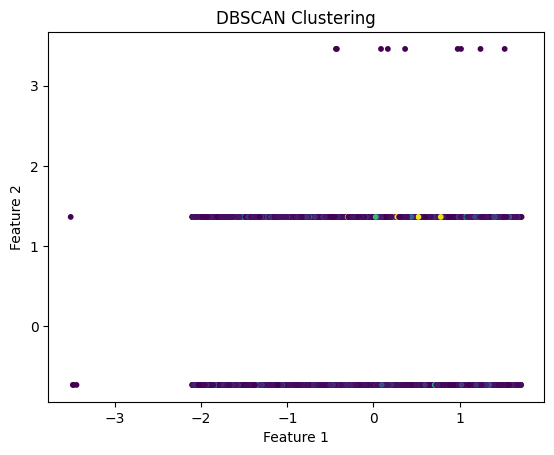

In [74]:
# Cluster Visualization
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels_train, cmap="viridis", s=10)
# plt.scatter(labels_train, camp="viridis", s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [75]:
unique_labels, counts = np.unique(labels_train, return_counts=True)
print(unique_labels)
print("\n{}".format(counts))

cluster_sizes = dict(zip(unique_labels, counts))
print(f"Cluster size: {cluster_sizes}")

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186]

[ 7316  2427  1013  3441 10538   271  4489  7153   934   553  1380   996
   525   802   199   549  2401    15   347    35  1862  1217   188   711
   920   503   454    40   182   472     6   517   158   361    35     9
   139    15   1

In [76]:
print(dbscan.labels_)

[ 0  1  2 ...  3 15  5]


# Forecasting on whether patients do smoke or do not

In [77]:
# Data splitting
copiedDf = df.copy()
y = copiedDf["smoke"]
X = copiedDf.drop(["smoke"], axis=1)

In [78]:
X.head()

age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  alco  active  \
id                                                                              
0   18393    2     168    62.0    110     80            0     0     0       1   
1   20228    1     156    85.0    140     90            1     0     0       1   
2   18857    1     165    64.0    130     70            1     0     0       0   
3   17623    2     169    82.0    150    100            0     0     0       1   
4   17474    1     156    56.0    100     60            0     0     0       0   

    cardio  overweight  
id                      
0        0           0  
1        1           0  
2        1           0  
3        1           0  
4        0           0

In [79]:
y.head()

id
0    0
1    0
2    0
3    0
4    0
Name: smoke, dtype: int64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [81]:
# Using Logistic Regression model to predict if a patient is a smoker or not
logistRegModel = LogisticRegression()
logistRegModel.fit(X_train, y_train)


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
# Evaluating the Logistic Regression model
accuracy = accuracy_score(y_test, logistRegModel.predict(X_test)) * 100
print(f"Accuracy (%): {accuracy}")

Accuracy (%): 91.4


In [85]:
# Forecasting on unseen data
def smokerPredictor(x_test: pd.DataFrame) -> None:
    for idx in range((x_test.shape)[0]):
        # print((x_test.iloc)[idx])
        pred = logistRegModel.predict(np.array([(x_test.iloc)[idx]]))
        if pred[0] == 0:
            print("Smoker")
        else:
            print("Not a smoker")

smokerPredictor(X_test)
# print((X_test.shape)[0])
# for idx in range((X_test.shape)[0]):
#     print(idx)

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smo

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker


/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Not a smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoke

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Sm

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 

Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Not a smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
Smoker
S

/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/duyla/data-science/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, 